In [18]:
function forward_diff(f, x, dx)
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx
end

forward_diff (generic function with 1 method)

In [19]:
function backward_diff(f, x, dx)
    fx = f(x)
    fxnh = f(x - dx)
    return (fx - fxnh) / dx
end

backward_diff (generic function with 1 method)

In [20]:
function central_diff(f, x, dx)
    fxph = f(x + dx)
    fxnh = f(x - dx)
    return (fxph - fxnh) / (2 * dx)
end

central_diff (generic function with 1 method)

In [21]:
function solve_problem(x)
    return -0.1 * (x ^ 4) - 0.15 * (x ^ 3) - 0.5 * (x ^ 2) - 0.25 * (x) + 1.2
end

solve_problem (generic function with 1 method)

In [22]:
function solve_problemDiff(x)
    return -0.4 * (x ^ 3) - 0.45 * (x ^ 2) - 1.0 * (x) - 0.25
end

solve_problemDiff (generic function with 1 method)

In [23]:
fd = forward_diff(solve_problem, 0.5, 0.5)

-1.45

In [24]:
cd = central_diff(solve_problem, 0.5, 0.5)

-1.0

In [25]:
bd = backward_diff(solve_problem, 0.5, 0.5)

-0.55

In [26]:
exact = solve_problemDiff(0.5)

-0.9125

In [27]:
using Printf

println("\tForward differencing\t\t Central differencing\t\t Backward differencing")
@printf("%10g (error=%10.2g)\t%10g (error=%10.2g)\t%10g (error=%10.2g)",
    fd, abs(fd - exact),
    cd, abs(cd - exact),
    bd, abs(bd - exact)
)

	Forward differencing		 Central differencing		 Backward differencing
     -1.45 (error=      0.54)	        -1 (error=     0.088)	     -0.55 (error=      0.36)

In [28]:
println("\tForward differencing\t\t Central differencing\t\t Backward differencing")

# We're going to store all the values for plotting,
# initialise variable for these
fd_errors = []
cd_errors = []
bd_errors = []
dx_all = []
dx = 0.5 # An initial mesh spacing

for i in 1:10
    fd = forward_diff(solve_problem, 0.5, dx)
    cd = central_diff(solve_problem, 0.5, dx)
    bd = backward_diff(solve_problem, 0.5, dx)
    @printf("%10g (error=%10.2g)\t%10g (error=%10.2g)\t%10g (error=%10.2g)\n",
        fd, abs(fd - exact),
        cd, abs(cd - exact),
        bd, abs(bd - exact)
    )
    #Store the h and the errors
    append!(dx_all, dx)
    append!(fd_errors, abs(fd - exact))
    append!(cd_errors, abs(cd - exact))
    append!(bd_errors, abs(bd - exact))
    dx = dx / 2 # Halve h for the next iteration
end

	Forward differencing		 Central differencing		 Backward differencing
     -1.45 (error=      0.54)	        -1 (error=     0.088)	     -0.55 (error=      0.36)
  -1.15469 (error=      0.24)	 -0.934375 (error=     0.022)	 -0.714063 (error=       0.2)
  -1.02754 (error=      0.12)	 -0.917969 (error=    0.0055)	 -0.808398 (error=       0.1)
 -0.968579 (error=     0.056)	 -0.913867 (error=    0.0014)	 -0.859155 (error=     0.053)
 -0.940189 (error=     0.028)	 -0.912842 (error=   0.00034)	 -0.885495 (error=     0.027)
 -0.926258 (error=     0.014)	 -0.912585 (error=   8.5e-05)	 -0.898913 (error=     0.014)
 -0.919357 (error=    0.0069)	 -0.912521 (error=   2.1e-05)	 -0.905685 (error=    0.0068)
 -0.915923 (error=    0.0034)	 -0.912505 (error=   5.3e-06)	 -0.909087 (error=    0.0034)
  -0.91421 (error=    0.0017)	 -0.912501 (error=   1.3e-06)	 -0.910792 (error=    0.0017)
 -0.913355 (error=   0.00085)	   -0.9125 (error=   3.3e-07)	 -0.911646 (error=   0.00085)


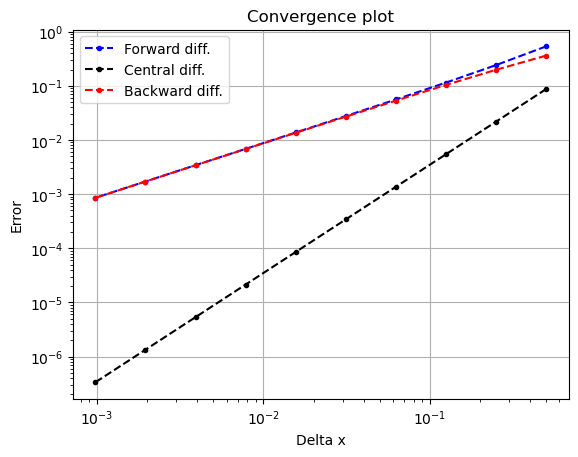

In [29]:
using PyPlot

n = length(dx_all)
loglog(dx_all, fd_errors, "b.--", label="Forward diff.")
loglog(dx_all, cd_errors, "k.--", label="Central diff.")
loglog(dx_all, bd_errors, "r.--", label="Backward diff.")

ylabel("Error")
xlabel("Delta x")

title("Convergence plot")

legend(loc="best")
grid(true)

# Task

In [30]:
fd = forward_diff(solve_problem, 1.25, 1)

-5.734375

In [31]:
cd = central_diff(solve_problem, 1.25, 1)

-3.634375

In [32]:
bd = backward_diff(solve_problem, 1.25, 1)

-1.534375

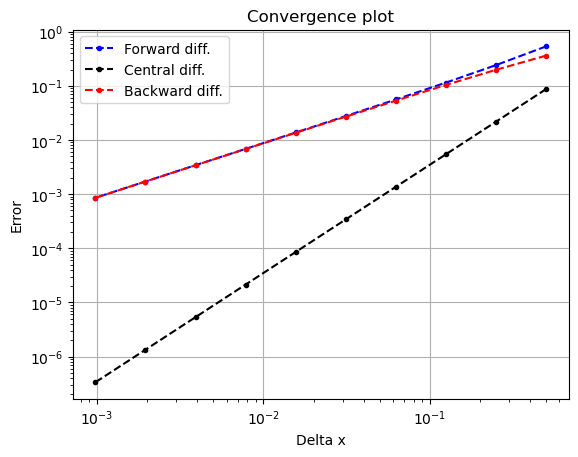

In [33]:
using PyPlot

n = length(dx_all)
loglog(dx_all, fd_errors, "b.--", label="Forward diff.")
loglog(dx_all, cd_errors, "k.--", label="Central diff.")
loglog(dx_all, bd_errors, "r.--", label="Backward diff.")

ylabel("Error")
xlabel("Delta x")

title("Convergence plot")

legend(loc="best")
grid(true)